<a href="https://colab.research.google.com/github/DiwakarBasnet/Machine-Learning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

Implementation of multiple linear regression, in which we will predict the profit of startups for a venture capitalist who wants to analyse whether a startup is worth investing to get good returns. The multiple linear relationship can be modelled by mathematical equation of form:-
\begin{align}
  \mathbf{y} = B_0 + B_1*X_1 + B_2*X_2 + ...... B_p*X_p
\end{align}

## Problem Analysis
In this data, we have four idependent variables; R&D Spend, Administration, Marketing Spend and State. There is one dependent variable Profit. We are going to train a multiple linear regression model with this data to understand the correlation between each of the four features and predict a profit for another new company.

# Data Preprocessing

## Importing libraries and dataset

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing the dataset
url = 'https://raw.githubusercontent.com/DiwakarBasnet/Machine-Learning/main/chapter-02-supervised-learning/dataset/Startups_Data.csv?token=GHSAT0AAAAAABYAO27L6UB2BZ2TH6RHETEMYZS4WEQ'
df = pd.read_csv(url)

In [ ]:
df.shape

(50, 5)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
# Declare feature variable and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Encoding categorical data

In this dataset, there is categorical data "State". We encode this categorical data using sklearn library. In this we import ColumnTransformer and OneHotEncoder. ColumnTrasformer allows a particular column of the DataFrame to be transformed separately.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
# transformers: list of (name, transformer, columns) tuples
#              name: encoder
#              transformer: OneHotEncoder()
#              columns: [3] ==> column number 3 i.e State column
# remainder ==> by default drop; only specified columns in transformers are transformed and other are dropped
#           ==> 'passthrough'; all remaining columns not specified will be automatically passed through

X = np.array(ct.fit_transform(X))

## Train test split

Here test_size = 0.2, which indicates that 20% of the data is the test set. In our case, 10 random startup data will be chosen as the test set and 40 remaining startup data will be chosen as training set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Training

Training the Multiple Linear Regression model on the Training dataset

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# training the model using train dataset
regressor.fit(X_train, y_train)

# predict on test dataset
y_pred = regressor.predict(X_test)

In [ ]:
data = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred, 'Difference':y_test-y_pred})
data

,Real Values,Predicted Values,Difference
0,96479.51,89268.022826,7211.487174
1,14681.40,50893.340668,-36211.940668
2,152211.77,150708.010508,1503.759492
3,77798.83,71755.908962,6042.921038
4,110352.25,112023.693994,-1671.443994
5,141585.52,125997.529048,15587.990952
6,64926.08,47197.867410,17728.212590
7,90708.19,73123.465231,17584.724769
8,105008.31,113999.073214,-8990.763214
9,191050.39,178032.960031,13017.429969


# Regression metrics for model performance

## RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: {:.4f}".format(rmse))

RMSE: 15879.7574


## $R^2$ Score
If $R^2$ Score >= 0.7, model is good enough to fit data

In [ ]:
from sklearn.metrics import r2_score
r2s = r2_score(y_test, y_pred)
print("R2 Score: {:.4f}".format(r2s))

R2 Score: 0.8842


# Visual Interpretation

Text(0, 0.5, 'Predicted')

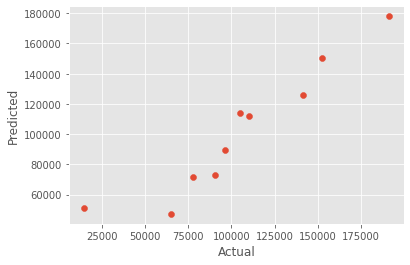

In [ ]:
# Plot the Regression Line
plt.style.use('ggplot')

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

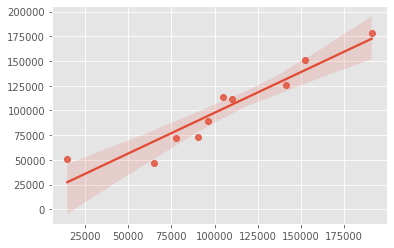

In [ ]:
# regression plot of model
import seaborn as sns
sns.regplot(x=y_test,y=y_pred)